# Yelp Business: EDA

The objective of this notebook is to explore the underlying data distribution of the businesses dataset post feature engineering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import Counter, OrderedDict

%matplotlib inline

In [2]:
#original file
business_dir = 'data/business.json'

#cleaned dataframes
business_clean_dir = 'data/cleaned'

#list out files in cleaned dir
clean_csv_list = os.listdir(business_clean_dir)
print(clean_csv_list)

['business_attributes.csv', 'business_cats.csv', 'business_roadtype.csv', 'business_is_usa.csv', 'business_hours.csv']


In [3]:
#download data
df_bus = pd.read_json(business_dir, orient='columns',lines=True)
#head
df_bus.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [4]:
def df_plot_count(df, col_drop, df_name,k=20,savepath=None):
    """
    plots the count of top values in a 1/0 time dataframe
    df = pandas dataframe
    col_drop = list of string name of columns to drop
    savepath = path to save to
    """
    
    #sum up by column
    val_count = df.drop(columns=col_drop).sum(axis=0).sort_values(ascending=False)
    
    #avoid error for slicing beyond index
    if len(val_count)<k:
        k = len(val_count)
    
    top_k_valcount = val_count[0:k]
    
    
    plt.figure(figsize=(15,5))
    sns.barplot(top_k_valcount.index, top_k_valcount.values, alpha=0.8, order=top_k_valcount.index)
    plt.title('Yelp Top {} Features for {}'.format(k, df_name))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(df_name, fontsize=12)
    plt.xticks(rotation=90)
    
    if savepath:
        plt.savefig(savepath)
    
    plt.show()
    

In [5]:
def plot_count_top_k(df, col, k=20,savepath=None):
    """
    plots the top k value counts in a dataframe
    df = pandas dataframe
    col = string name of columns   
    k = top k integer values
    savepath = path to save to
    """
    
    val_count = df[col].value_counts()
    
    #avoid error for slicing beyond index
    if len(val_count)<k:
        k = len(val_count)
    
    top_k_valcount = val_count[0:k]
    
    
    plt.figure(figsize=(15,5))
    sns.barplot(top_k_valcount.index, top_k_valcount.values, alpha=0.8, order=top_k_valcount.index)
    plt.title('Yelp top {} {}'.format(k, col))
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=90)
    
    if savepath:
        plt.savefig(savepath)
    
    plt.show()
    

## Which Cities Have the Most Businesses?

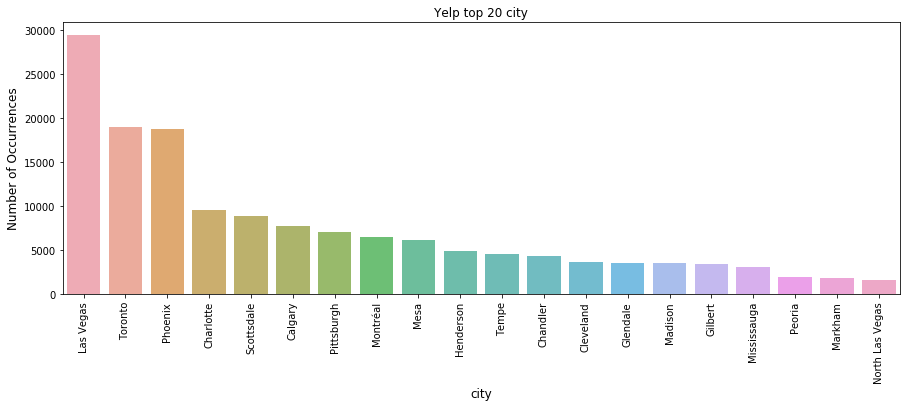

In [6]:
plot_count_top_k(df_bus, 'city', savepath='plots/business_top_city.png')

## Which States Have the Most Businesses?

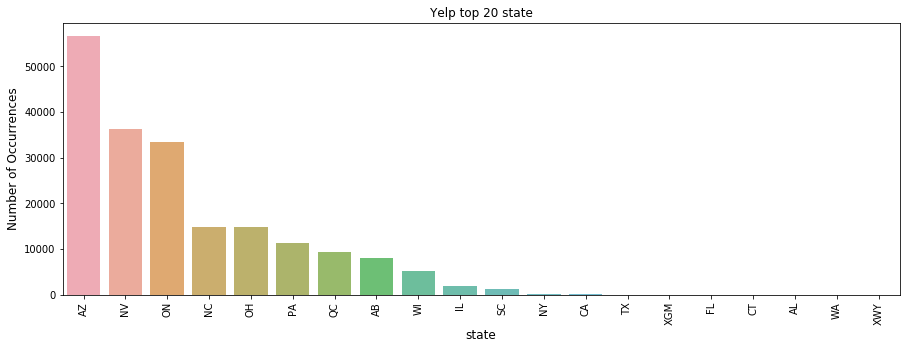

In [7]:
plot_count_top_k(df_bus, 'state', savepath='plots/business_top_state.png')

## Which Postal Codes Have the Most Businesses?

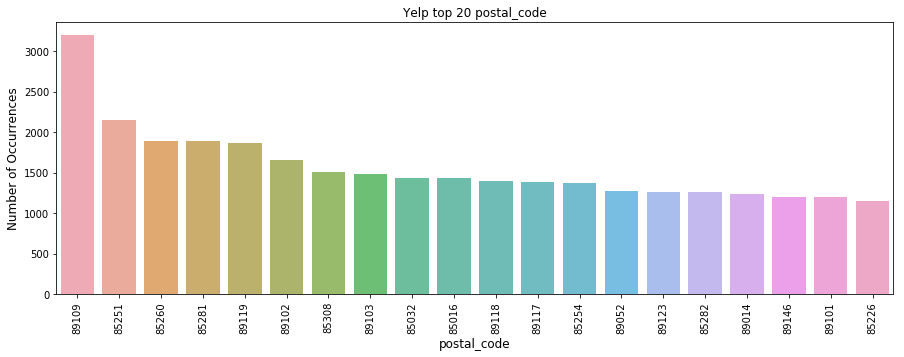

In [8]:
plot_count_top_k(df_bus, 'postal_code',savepath='plots/business_top_zip.png')

## How Are Stars Distributed?

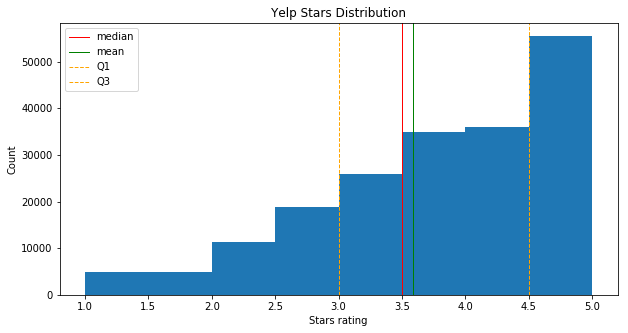

In [9]:
plt.figure(figsize=(10,5))
plt.hist(df_bus['stars'], bins=np.arange(1,5.5,0.5))
plt.xticks(np.arange(1,5.5,0.5))
plt.xlabel('Stars rating')
plt.ylabel("Count")

#stats
plt.axvline(df_bus['stars'].median(), color='red',linestyle='solid', linewidth=1, label='median')
plt.axvline(df_bus['stars'].mean(), color='green',linestyle='solid', linewidth=1, label='mean')
plt.axvline(df_bus.stars.describe()['25%'], color='orange',linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(df_bus.stars.describe()['75%'], color='orange',linestyle='dashed', linewidth=1, label='Q3')


plt.legend()
plt.title("Yelp Stars Distribution")
plt.savefig('plots/business_stars.png')
plt.show()

## Open Vs Close

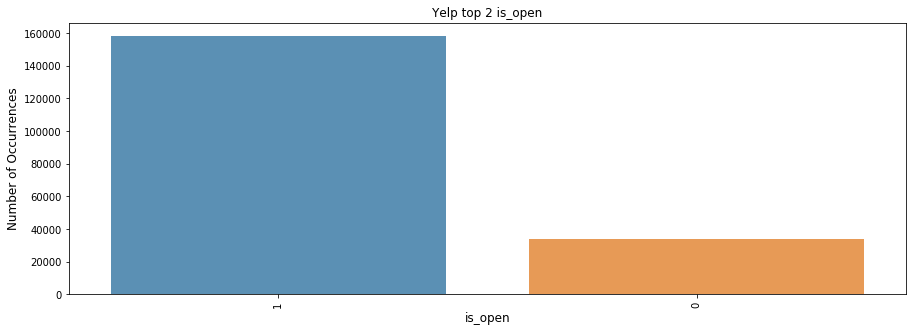

In [10]:
plot_count_top_k(df_bus, 'is_open',savepath='plots/business_isopen.png')

## Road Type

In [11]:
#load the datafram
road_type_df = pd.read_csv('data/cleaned/business_roadtype.csv', index_col=0)
road_type_df.head()

,road,boulevard,hwy,str,ave,dr,ct,ln,pkwy,business_id
0,0,0,0,0,0,1,0,0,0,1SWheh84yJXfytovILXOAQ
1,0,0,0,0,1,0,0,0,0,QXAEGFB4oINsVuTFxEYKFQ
2,1,0,0,0,0,0,0,0,0,gnKjwL_1w79qoiV3IC_xQQ
3,0,0,0,0,0,0,0,0,0,xvX2CttrVhyG2z1dFg_0xw
4,0,1,0,0,0,1,0,0,0,HhyxOkGAM07SRYtlQ4wMFQ


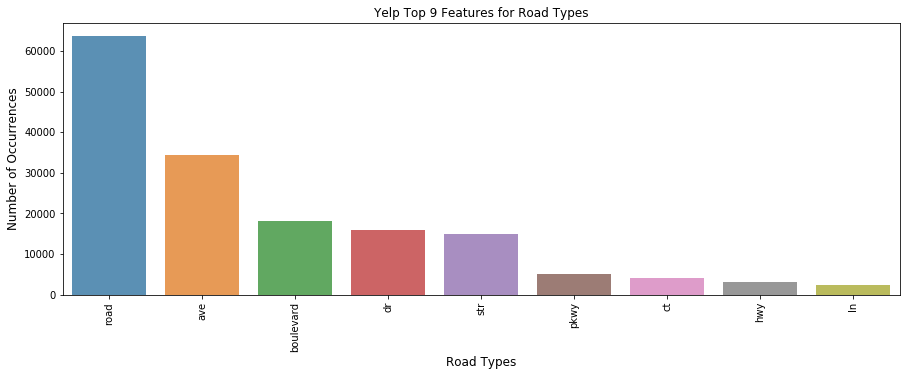

In [12]:
df_plot_count(road_type_df, ['business_id'], 'Road Types',savepath='plots/business_roads.png')

## Attributes

In [13]:
#load the datafram
df_atr = pd.read_csv('data/cleaned/business_attributes.csv', index_col=0)
df_atr.head()

,GoodForKids,RestaurantsReservations,Caters,RestaurantsTableService,RestaurantsTakeOut,OutdoorSeating,BikeParking,HasTV,RestaurantsGoodForGroups,RestaurantsDelivery,...,Smoking_yes,AgesAllowed_18plus,AgesAllowed_19plus,AgesAllowed_21plus,AgesAllowed_allages,price_range_1,price_range_2,price_range_3,price_range_4,business_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1SWheh84yJXfytovILXOAQ
1,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,QXAEGFB4oINsVuTFxEYKFQ
2,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,gnKjwL_1w79qoiV3IC_xQQ
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,xvX2CttrVhyG2z1dFg_0xw
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,HhyxOkGAM07SRYtlQ4wMFQ


In [43]:
df_atr.describe()

,GoodForKids,RestaurantsReservations,Caters,RestaurantsTableService,RestaurantsTakeOut,OutdoorSeating,BikeParking,HasTV,RestaurantsGoodForGroups,RestaurantsDelivery,...,Smoking_outdoor,Smoking_yes,AgesAllowed_18plus,AgesAllowed_19plus,AgesAllowed_21plus,AgesAllowed_allages,price_range_1,price_range_2,price_range_3,price_range_4
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,...,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,0.276882,0.104601,0.107295,0.055657,0.293278,0.113920,0.344382,0.132891,0.246209,0.072141,...,0.006729,0.001833,0.000078,0.000083,0.000369,0.000093,0.175791,0.319331,0.054317,0.011708
std,0.447459,0.306039,0.309489,0.229258,0.455266,0.317715,0.475167,0.339458,0.430803,0.258722,...,0.081752,0.042771,0.008825,0.009114,0.019196,0.009667,0.380644,0.466219,0.226643,0.107567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


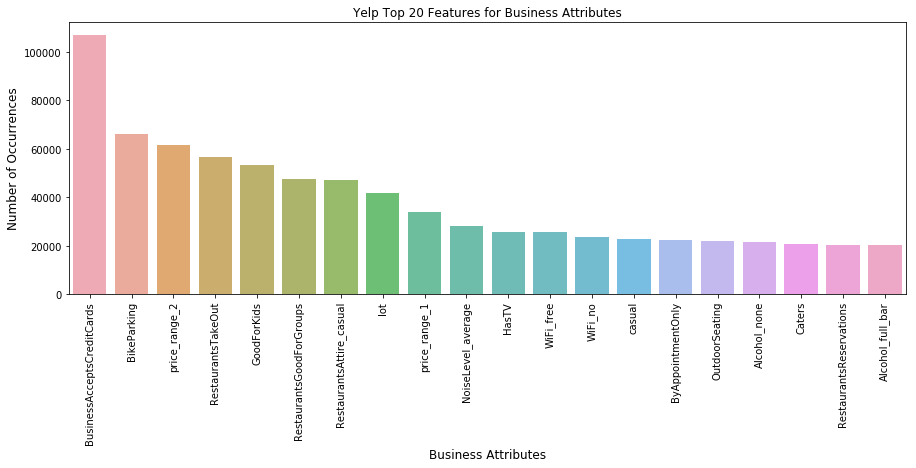

In [14]:
df_plot_count(df_atr, ['business_id'], 'Business Attributes',savepath='plots/business_attributes.png')

In [39]:
def df_binary_corr_plot(df, col_drop, k=20, title=None,savepath=None, fig_size = (15,15)):
    """
    Takes in a dataframe and plots the correlation matrix for top k columns based on feature presence
    df = pandas dataframe
    col_drop = columns to drop
    k = top k
    savepath = save directory
    fig_size = tuple for figure size
    """
    
    #sum  over rows minus dropped cols
    cats_sum = df.drop(columns=col_drop).sum(axis=0)
    
    #sort descending
    cats_sum_sorted = cats_sum.sort_values(ascending=False)
    
    #get top k column names
    cats_sum_topk = cats_sum_sorted.index[0:k]
    
    df_corr = df[cats_sum_topk].corr()
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=fig_size)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    if title:
        plt.title("{} Pearson Correlation Heatmap".format(title))

    if savepath:
        plt.savefig("plots/portfolio_corr.png")
    
    plt.show()
    
    

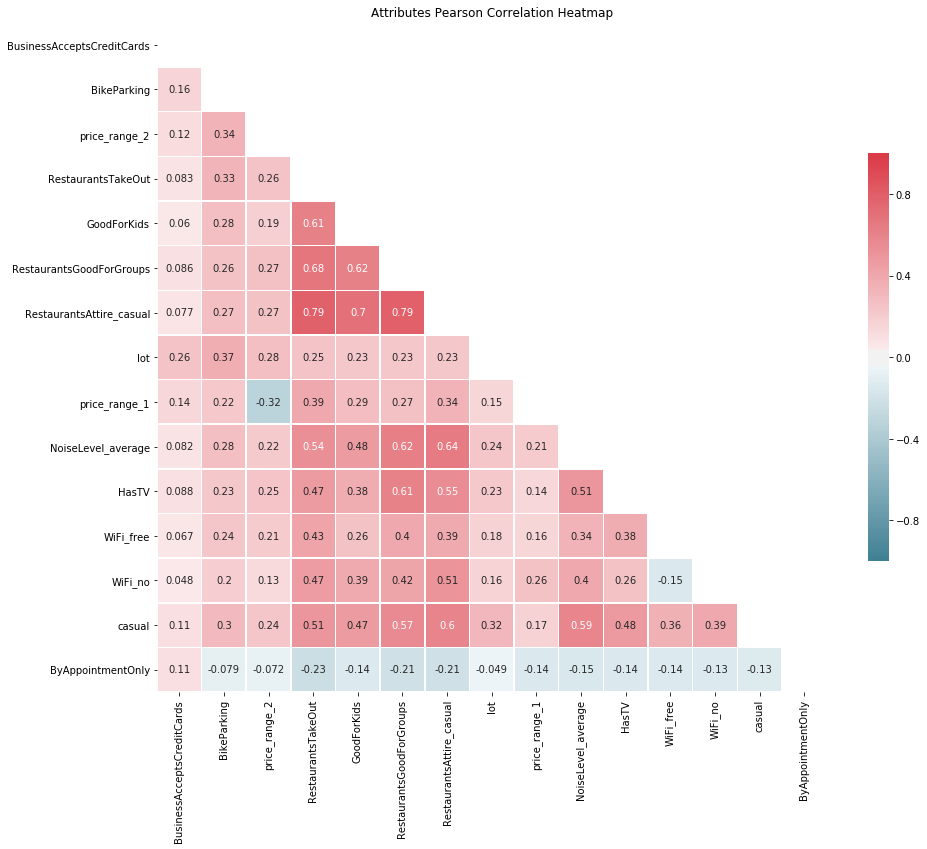

In [42]:
df_binary_corr_plot(df_atr, ['business_id'],
                    k=15,title='Attributes',
                    savepath='plots/business_attributes_corr.png')